#Análisis de datos

En esta parte del taller vamos a analizar, usando herramientas de ESDA (*Exploratory Spatial Data Analysis*), los datos generados con el modelo de Hagerstrand. El objetivo es empezar a comprender la relación entre las estadísticas espaciales y los procesos que dan lugar a las distribuciones que observamos.

Para analizar los datos vamos a utilizar la librería de análisis [pysal](https://pysal.readthedocs.org/en/latest/) que es el equivalente en Python al software OpenGeoda.

Como ustedes saben, la [I de Moran](http://en.wikipedia.org/wiki/Moran%27s_I) mide la *autocorrelación* espacial de distribuciones espaciale. Utilicemos esta medida para analizar los resultados del modelo, comencemos con la difusión aleatoria:

Populating the interactive namespace from numpy and matplotlib
acabé
Hay 1012 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 10


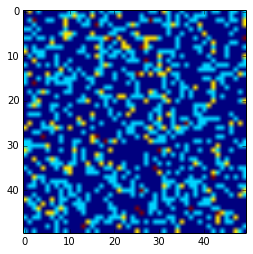

In [10]:
%pylab inline
from haggerstrand.diffusion import SimpleDiffusion
s = SimpleDiffusion(50,50,9,20,[(20,20)],0.3,10)
s.random_diffusion()
plt.imshow(s.result[:,:,9])

Calculemos su I de Moran:

In [12]:
import pysal as ps
w = ps.lat2W(s.M,s.N,rook=False)
mr = ps.Moran(s.result[:,:,9].flatten(),w)

En la primera linea importamos la librería `pysal`con el nombre `ps`; en la segunda linea creamos una matriz de pesos, utilizando vecindades de tipo *reina* (por eso `rook=False`) para una malla regular del mismo tamaño que el espacio del modelo y en la tercera linea le pedimos a `pysal` que calcule las estadísticas de Moran para nuestros resultados. Noten como usamos `s.result[:,:,9].flatten()` para "aplanar" la matriz y convertirla en una lista, muy parecida a un *shapefile*.

Observemos ahora los resultados del análisis:

In [14]:
print "La I de Moran es %f" % mr.I
print "El valor esperado, bajo suposición de normalidad es %f" % mr.EI 
print "El valor de significancia es %f" % mr.p_rand

La I de Moran es 0.020231
El valor esperado, bajo suposición de normalidad es -0.000400
El valor de significancia es 0.106776


¿Cómo interpretamos estos valores?

Ahora vamos a calcular la I de Moran para la difusión espacial:

acabé
Hay 846 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 10


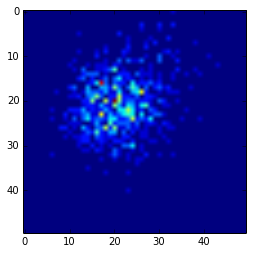

In [15]:
s.spatial_diffusion()
plt.imshow(s.result[:,:,9])

In [16]:
mr_spatial = ps.Moran(s.result[:,:,9].flatten(),w)
print "La I de Moran es %f" % mr_spatial.I
print "El valor esperado, bajo suposición de normalidad es %f" % mr_spatial.EI 
print "El valor de significancia es %f" % mr_spatial.p_rand

La I de Moran es 0.514821
El valor esperado, bajo suposición de normalidad es -0.000400
El valor de significancia es 0.000000


Como podemos ver, la I de Moran es mucho más grande (y más significativa) para la difusión espacial que para la difusión aleatoria. Este es justo el resultado que esperamos, cuando usamos el modelo de Hagerstrand los datos tienden a paracerse en vecindades, lo cual genera una autocorrelación espacial positiva.

##Ejercicio
Juegen con diferentes parámetros del algoritmo para observar como se modifica la I de Moran
¿Cuál es el parámetro más importante?

acabé
Hay 5160 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15
La I de Moran es 0.836315
El valor esperado, bajo suposición de normalidad es -0.000400
El valor de significancia es 0.000000


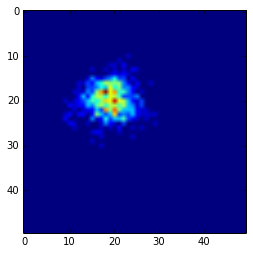

In [21]:
s = SimpleDiffusion(50,50,5,20,[(20,20)],0.1,15)
s.spatial_diffusion()
w = ps.lat2W(s.M,s.N,rook=False)
mr_spatial = ps.Moran(s.result[:,:,9].flatten(),w)
print "La I de Moran es %f" % mr_spatial.I
print "El valor esperado, bajo suposición de normalidad es %f" % mr_spatial.EI 
print "El valor de significancia es %f" % mr_spatial.p_rand
plt.imshow(s.result[:,:,9])


Como ya dijimos antes en la realidad es difícil observar fenómenos de difusión "pura", para simular esta situación, la clase `SimpleDiffusion` tiene el método `mixed_diffusion()` que mezcla los dos tipos de difusión que hemos visto (aleatoria y espacial) de acuerdo a una proporción:

acabé
Hay 20708 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


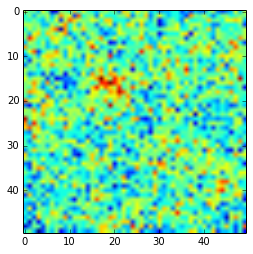

In [23]:
s = SimpleDiffusion(50,50,5,20,[(20,20)],0.1,15)
s.mixed_diffusion(0.5)
plt.imshow(s.result[:,:,s.max_iter-1])

El argumento que le pasamos a `s.mixed_diffusion(0.5)` le dice al algoritmo que, en este caso, la mitad de los eventos de difusión los haga de acuerdo a Hagerstrand y la otra mitad los haga aleatoriamente. De modo que si la proporción es 0, el fenómeno es aleatorio y si es 1 es totalmente espacial.
Calculemos la I de Moran para este caso:

acabé
Hay 176351 adoptantes de un total de 200000 habitantes
El total de iteraciones realizadas es 20
La I de Moran es 0.312297
El valor esperado, bajo suposición de normalidad es -0.000100
El valor de significancia es 0.000000


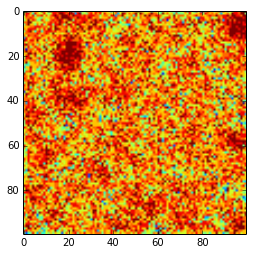

In [28]:
s = SimpleDiffusion(100,100,5,20,[(20,20)],0.2,20)
s.mixed_diffusion(0.7)
w = ps.lat2W(s.M,s.N,rook=False)
mr_spatial = ps.Moran(s.result[:,:,9].flatten(),w)
print "La I de Moran es %f" % mr_spatial.I
print "El valor esperado, bajo suposición de normalidad es %f" % mr_spatial.EI 
print "El valor de significancia es %f" % mr_spatial.p_rand
plt.imshow(s.result[:,:,s.max_iter-1])

##Ejercicio
Experimenten con diferentes valores de la proporción y de los demás parámetros